# CREDIT CARD TRANSACTIONS PROJECT


## Introduction
Credit card transactions have become an important part of modern financial systems, providing convenience and flexibility to consumers. However, with the increasing volume of transactions, it's crucial to analyze and understand these transactions to identify trends, anomalies,etc.. 


Import all libraries that is needed for the project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the modules that is needed

In [3]:
import datetime

Import the dataframe using the read_excel() function (because the file is in excel format) and print the dataframe using .to_string() function

In [4]:

df = pd.read_excel("D:\DATAANALYTICS\DATASET\credit_card_transactions.xlsx")

Analyzing dataframe by taking a sample data to get an overview of the overall dataframe
First 10 rows is taken using head() and last 10 rows is taken using tail() 

In [5]:
print(df.head(10))
print(df.tail(10))

   Unnamed: 0 trans_date_trans_time        cc_num  \
0         NaN                   NaT           NaN   
1         NaN                   NaT           NaN   
2      1000.0   2019-01-01 12:41:17  5.559857e+15   
3      1001.0   2019-01-01 12:41:20  3.672270e+13   
4      1002.0   2019-01-01 12:41:24  3.412831e+14   
5      1003.0   2019-01-01 12:41:33  4.742884e+18   
6      1004.0   2019-01-01 12:42:44  4.681699e+12   
7      1005.0   2019-01-01 12:43:35  5.127412e+15   
8      1006.0   2019-01-01 12:44:01  2.269769e+15   
9      1007.0   2019-01-01 12:44:14  6.049559e+10   

                             merchant       category     amt      first  \
0                                 NaN            NaN     NaN        NaN   
1                                 NaN            NaN     NaN        NaN   
2     fraud_Berge, Kautzer and Harris  personal_care   88.70       Jack   
3  fraud_Quitzon, Green and Bashirian   shopping_pos    2.72    Jessica   
4                   fraud_Zboncak Ltd    

To take all informations about the dataframe use .info(). This info will contain number of columns, rows, its datatype, column name, etc. 

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24639 entries, 0 to 24638
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             24637 non-null  float64       
 1   trans_date_trans_time  24637 non-null  datetime64[ns]
 2   cc_num                 24637 non-null  float64       
 3   merchant               24637 non-null  object        
 4   category               24637 non-null  object        
 5   amt                    24637 non-null  float64       
 6   first                  24637 non-null  object        
 7   last                   24637 non-null  object        
 8   gender                 24637 non-null  object        
 9   street                 24637 non-null  object        
 10  city                   24637 non-null  object        
 11  state                  24637 non-null  object        
 12  zip                    24637 non-null  float64       
 13  l

## Data Cleaning & Analysis

To see if there is any null cells is in the dataframe use .isna()

In [7]:
print(df.isna().sum())

Unnamed: 0                  2
trans_date_trans_time       2
cc_num                      2
merchant                    2
category                    2
amt                         2
first                       2
last                        2
gender                      2
street                      2
city                        2
state                       2
zip                         2
lat                         2
long                        2
city_pop                    2
job                         2
dob                         2
trans_num                   2
unix_time                   2
merch_lat                   2
merch_long                  2
is_fraud                    2
merch_zipcode            3771
dtype: int64


To get the total number of empty cells in the dataframe

In [8]:
print(df.isna().sum().sum())

3817


Droping null cells using dropna()

In [9]:
df = df.dropna()

Drop all unnessecary columns using drop()

In [10]:
columns_to_drop = ["zip","lat","long","trans_num","unix_time","merch_lat","merch_long","merch_zipcode"]
df = df.drop(columns=columns_to_drop,axis=1)

Checking if duplicate values are in the dataframe using duplicated()

In [11]:
print(df.duplicated())

4        False
6        False
7        False
8        False
9        False
         ...  
24634    False
24635    False
24636    False
24637    False
24638    False
Length: 20868, dtype: bool


Droping duplicate values if there is any using drop_duplicates()

In [12]:
df = df.drop_duplicates()

Change the data type of the columns if needed


ploting a box plot to find if tere is any outlayers in the dataframe

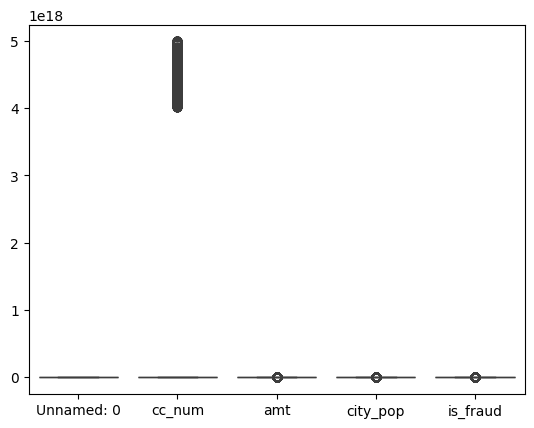

In [13]:
sns.boxplot(df)
plt.show()

Removing outliers 

In [14]:
df["z_score"] = (df["cc_num"] - df["cc_num"].mean()) / df["cc_num"].std()
threshold = 2
df = df[df["z_score"].abs() <= threshold]
df = df.drop(columns=["z_score"])

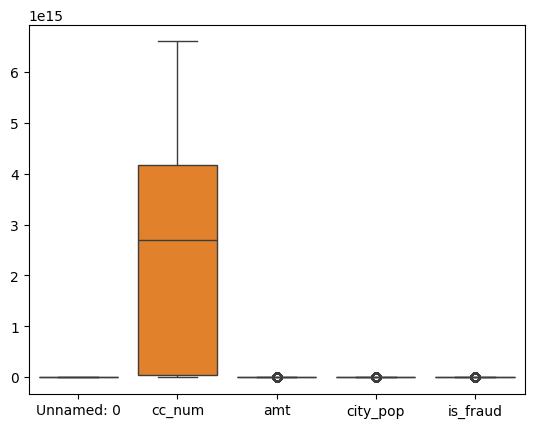

In [15]:
sns.boxplot(df)
plt.show()

## Stastical Analysis

Finding correlation using corr() 

In [16]:
print(df.corr(numeric_only=True))

            Unnamed: 0    cc_num       amt  city_pop  is_fraud
Unnamed: 0    1.000000 -0.006338  0.018215 -0.000264  0.034588
cc_num       -0.006338  1.000000 -0.004345  0.008777 -0.001482
amt           0.018215 -0.004345  1.000000  0.011332  0.272877
city_pop     -0.000264  0.008777  0.011332  1.000000  0.016538
is_fraud      0.034588 -0.001482  0.272877  0.016538  1.000000


Finding covarience using cov() 

In [17]:
print(df.cov(numeric_only=True))

              Unnamed: 0        cc_num           amt      city_pop  \
Unnamed: 0  5.080438e+07 -9.979751e+16  1.981062e+04 -5.700543e+05   
cc_num     -9.979751e+16  4.879505e+30 -1.464650e+15  5.863368e+18   
amt         1.981062e+04 -1.464650e+15  2.328214e+04  5.228955e+05   
city_pop   -5.700543e+05  5.863368e+18  5.228955e+05  9.145609e+10   
is_fraud    2.291038e+01 -3.041436e+11  3.869283e+00  4.647828e+02   

                is_fraud  
Unnamed: 0  2.291038e+01  
cc_num     -3.041436e+11  
amt         3.869283e+00  
city_pop    4.647828e+02  
is_fraud    8.635831e-03  


Doing the all other statistical functions

In [18]:
print(df.describe())

         Unnamed: 0          trans_date_trans_time        cc_num  \
count  18941.000000                          18941  1.894100e+04   
mean   13330.341587  2019-01-08 22:45:43.108600320  2.389715e+15   
min     1002.000000            2019-01-01 12:41:24  6.041621e+10   
25%     7147.000000            2019-01-05 17:12:16  3.691359e+13   
50%    13294.000000            2019-01-08 14:17:28  2.703186e+15   
75%    19538.000000            2019-01-12 21:31:17  4.169760e+15   
max    25636.000000            2019-01-15 17:09:20  6.597888e+15   
std     7127.719277                            NaN  2.208960e+15   

                amt      city_pop                            dob      is_fraud  
count  18941.000000  1.894100e+04                          18941  18941.000000  
mean      70.966517  8.926032e+04  1973-10-13 22:25:43.698854336      0.008711  
min        1.000000  2.300000e+01            1924-10-30 00:00:00      0.000000  
25%        9.550000  8.050000e+02            1962-04-12 00:00:0

### 1. What is the most common transaction category 
 

category
home    1886
Name: count, dtype: int64


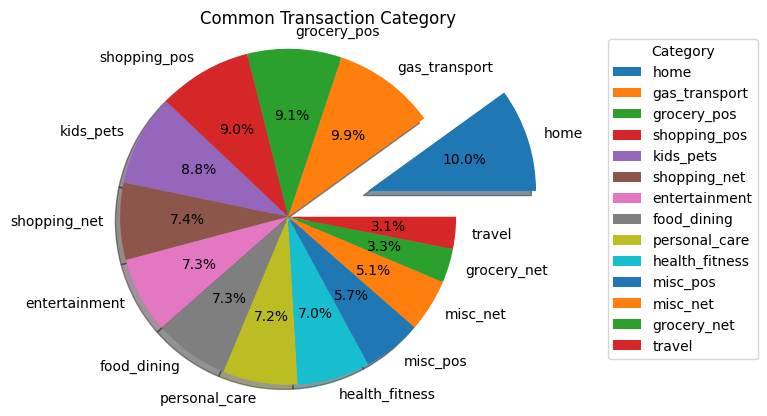

In [19]:
common_category = df["category"].value_counts()
print(common_category.head(1))
mylabels = ["home", "gas_transport", "grocery_pos", "shopping_pos", "kids_pets", "shopping_net", "entertainment", "food_dining", "personal_care","health_fitness", "misc_pos", "misc_net", "grocery_net", "travel"]
myexplod = [0.5,0,0,0,0,0,0,0,0,0,0,0,0,0]
plt.pie(common_category, labels = mylabels, explode = myexplod,autopct='%1.1f%%', shadow = True)
plt.title("Common Transaction Category")
plt.legend(title="Category",loc= "best",bbox_to_anchor=(1.05,1))
plt.axis("equal")
plt.show()

### 2. What is the gender distribution of card-holders

gender
F    10214
M     8727
Name: count, dtype: int64


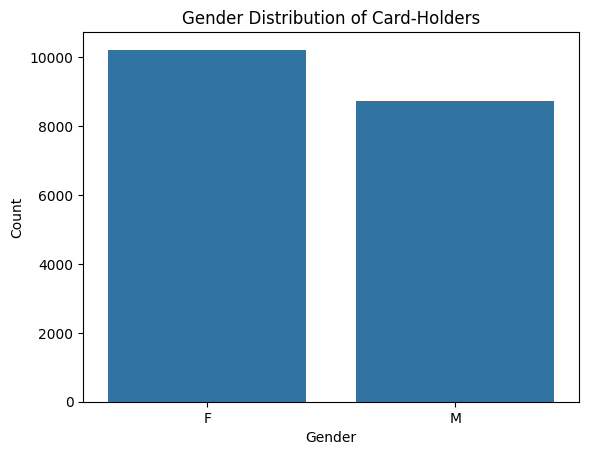

In [20]:
gender_counts = df["gender"].value_counts()
print(gender_counts)
plt.title("Gender Distribution of Card-Holders")
plt.xlabel("Gender")
plt.ylabel("Count")
sns.barplot(gender_counts)
plt.show()

### 3. Who have the highest spending and How much

In [21]:
highest_spending = df["amt"].max()
print(highest_spending)
df["card_holder"] = df["first"].str.cat(df["last"], sep = " ")
highest_spending_merch = df.loc[df["amt"] == highest_spending, "card_holder"].values[0]
print(highest_spending_merch)

11872.21
Gloria Wallace


### 4. Does there is any relation between city population and spending

0.011331754567749668


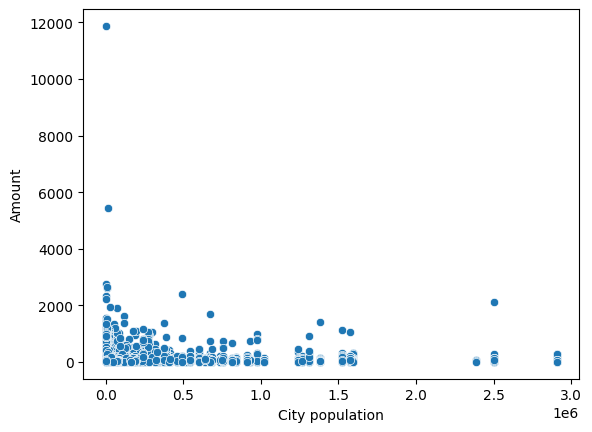

In [22]:
correlation = df["city_pop"].corr(df["amt"])
print(correlation)
sns.scatterplot(x = "city_pop", y = "amt", data = df)
plt.xlabel("City population")
plt.ylabel("Amount")
plt.show()

### 5. which job has the highest average spending

In [23]:
job_grouped = df.groupby("job")
job_avg  = job_grouped["amt"].mean()
job_mean_sorted = job_avg.sort_values(ascending = False)
print(job_mean_sorted.head(1))

job
Conservator, furniture    484.655
Name: amt, dtype: float64


### 6. What is the highest spending from all states

state
AL     2409.18
AR     1003.72
AZ      916.48
CA     1323.74
CO      636.00
CT      889.09
DC      450.53
FL     1113.30
GA      845.79
IA      833.63
ID      881.69
IL      785.98
IN      905.28
KS      550.70
KY      535.16
LA     1377.00
MA      492.16
MD     2753.89
ME      990.43
MI     1909.33
MN     1456.48
MO     1245.33
MS     1021.87
MT      499.80
NC     1254.27
ND      291.13
NE     1034.21
NH    11872.21
NJ     1948.23
NM     2612.14
NV      673.34
NY     5444.24
OH     1180.30
OK     1621.24
OR     1555.17
PA     1329.24
RI      519.24
SC     1003.54
SD     1006.34
TN     1025.38
TX     1101.10
UT      531.25
VA     1242.75
VT     2239.16
WA     1067.73
WI      672.79
WV      776.98
WY      456.68
Name: amt, dtype: float64


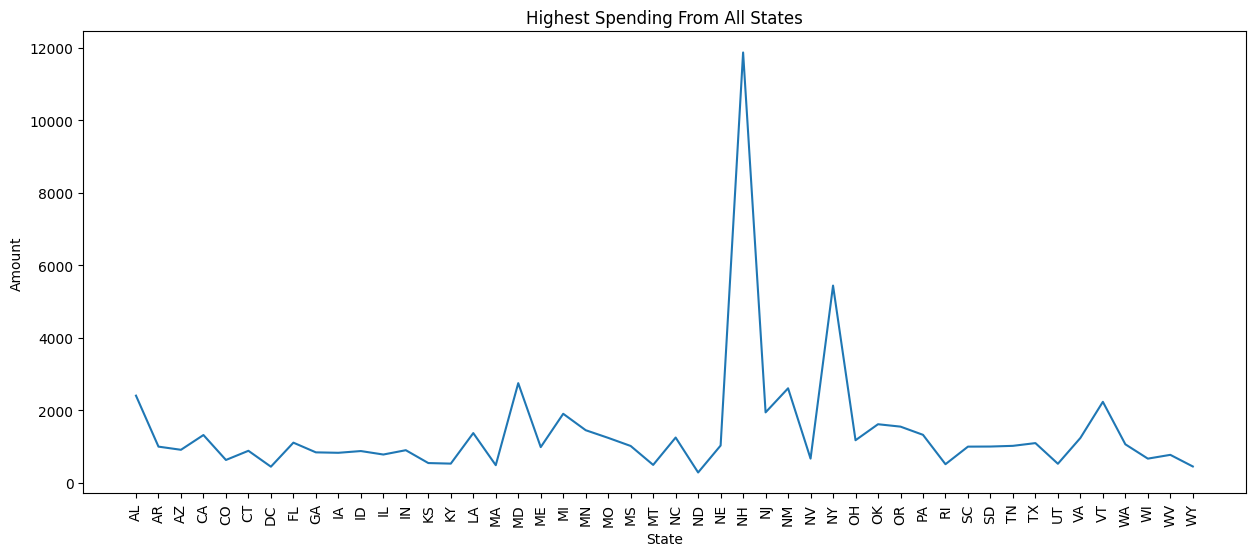

In [24]:
state_amt_grouped = df.groupby("state")["amt"].max()
print(state_amt_grouped)
plt.figure(figsize=(15,6))
plt.title("Highest Spending From All States")
plt.xlabel("State")
plt.ylabel("Amount")
sns.lineplot(state_amt_grouped)
plt.xticks(rotation = 90)
plt.show()

### 7. What is the age group and their average spending accordingly

age_group
0-20      57.872231
21-40     74.245315
41-60     70.649073
61-80     66.320598
81-100    71.841673
Name: amt, dtype: float64


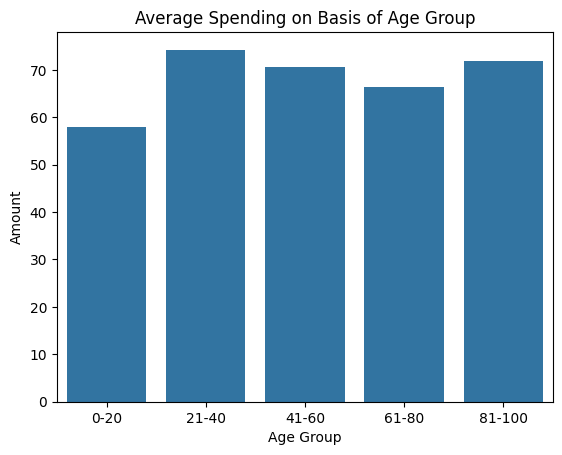

In [25]:
today =datetime.datetime.today()
age = []
for idx, row in df.iterrows():
    dob_year, dob_month, dob_day = row["dob"].year, row["dob"].month, row["dob"].day
    if (today.month, today.day) > (dob_month, dob_day):
        age.append(today.year - dob_year)
    else:
        age.append(today.year - dob_year - 1)
df["age"] = age
age_bins = [0,20,40,60,80,100]
labels = ["0-20","21-40","41-60","61-80","81-100"]
df["age_group"] = pd.cut(df["age"], bins = age_bins, labels = labels)
avg_amt_age_group = df.groupby("age_group", observed = True)["amt"].mean()
print(avg_amt_age_group)
sns.barplot(avg_amt_age_group)
plt.title("Average Spending on Basis of Age Group")
plt.xlabel("Age Group")
plt.ylabel("Amount")
plt.show()

### 8. What are the most common jobs

job
Systems developer    151
Name: count, dtype: int64


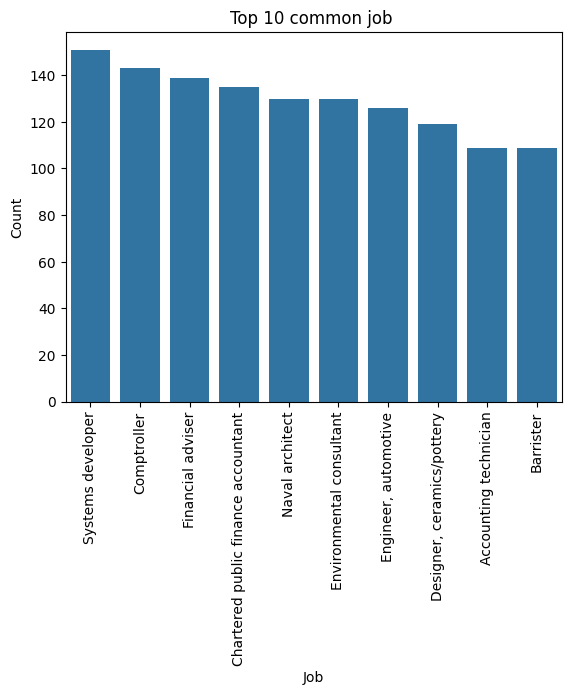

In [26]:
common_job = df["job"].value_counts()
print(common_job.head(1))
top_10_common_jobs = common_job.head(10)
sns.barplot(top_10_common_jobs)
plt.title("Top 10 common job ")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.show()

### 9. What is the distribution of card-holder location (state wise) and Which state have most card-holders

state
NY    1320
Name: count, dtype: int64


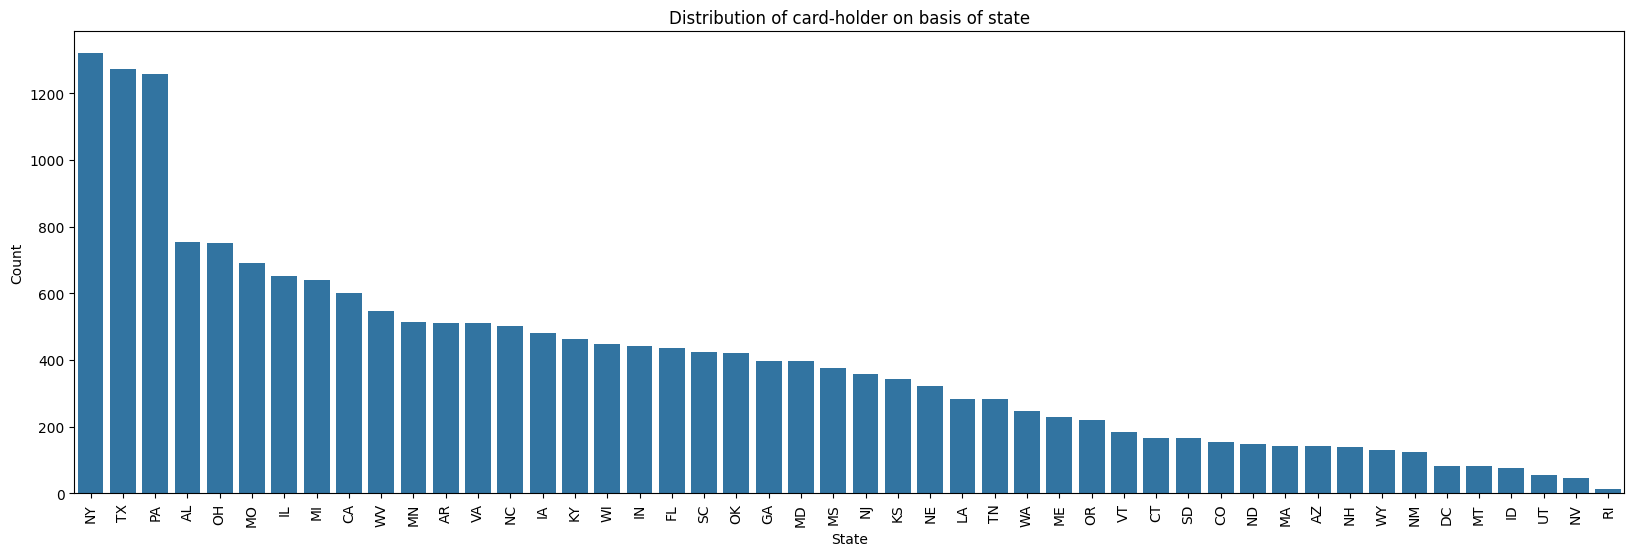

In [27]:
common_state = df["state"].value_counts()
print(common_state.head(1))
plt.figure(figsize=(20,6))
sns.barplot(common_state)
plt.title("Distribution of card-holder on basis of state")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.show()

### 10. Which city have the most transactions

In [28]:
common_city = df["city"].value_counts()
print(common_city.head(1))

city
Birmingham    112
Name: count, dtype: int64


### 11. How does the average transaction vary by gender

gender
F    70.400711
M    71.628732
Name: amt, dtype: float64


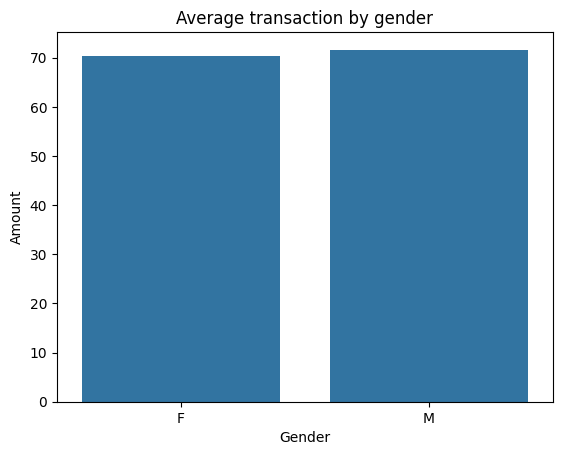

In [29]:
gend_grouped = df.groupby("gender")
avg_amt = gend_grouped["amt"].mean()
print(avg_amt)
sns.barplot(avg_amt)
plt.title("Average transaction by gender")
plt.xlabel("Gender")
plt.ylabel("Amount")
plt.show()

### 12. What is the most common datetime for transaction

In [30]:
common_datetime = df["trans_date_trans_time"].value_counts()
print(common_datetime.head(2))


trans_date_trans_time
2019-01-14 16:40:31    3
2019-01-15 06:58:17    3
Name: count, dtype: int64


### 13. Which age group is the most common in birmingham city

age_group
21-40    63
Name: count, dtype: int64


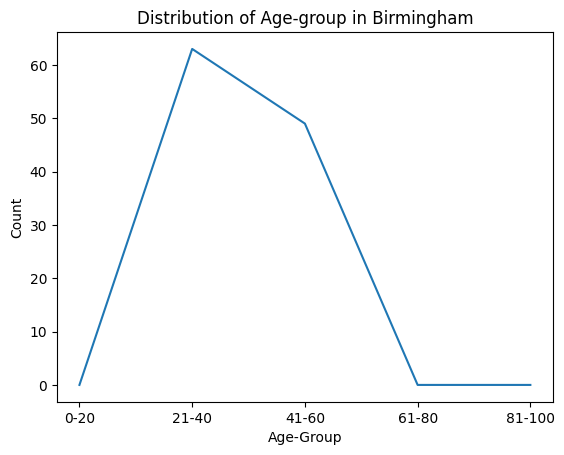

In [31]:
city_grouped = df.groupby("city")
birmingham_city = city_grouped.get_group("Birmingham")
birmingham_city_age_group = birmingham_city["age_group"].value_counts()
print(birmingham_city_age_group.head(1))
sns.lineplot(birmingham_city_age_group)
plt.title("Distribution of Age-group in Birmingham")
plt.xlabel("Age-Group")
plt.ylabel("Count")
plt.show()

### 14. what is the average amount spended on each category

category
entertainment      65.618881
food_dining        49.402125
gas_transport      63.468135
grocery_net        54.629098
grocery_pos       118.952999
health_fitness     53.280543
home               57.121972
kids_pets          57.777786
misc_net           87.694252
misc_pos           59.239449
personal_care      48.376698
shopping_net       99.704936
shopping_pos       81.299175
travel            104.449125
Name: amt, dtype: float64


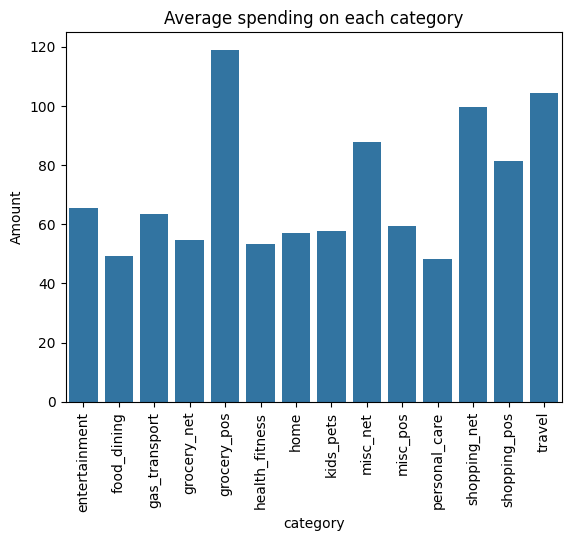

In [32]:
category_grouped = df.groupby("category")
avg_amt_category = category_grouped["amt"].mean()
print(avg_amt_category)
sns.barplot(avg_amt_category)
plt.title("Average spending on each category")
plt.xlabel("category")
plt.ylabel("Amount")
plt.xticks(rotation = 90)
plt.show()

### 15. What is the average amount spent on each category by both gender

category        gender
entertainment   F          69.291997
                M          61.687713
food_dining     F          48.990959
                M          49.868199
gas_transport   F          61.509732
                M          65.734931
grocery_net     F          57.572819
                M          51.136021
grocery_pos     F         137.944345
                M          97.235056
health_fitness  F          50.959549
                M          55.787363
home            F          52.904191
                M          61.531887
kids_pets       F          55.196952
                M          61.097015
misc_net        F          86.464070
                M          89.288496
misc_pos        F          67.653413
                M          50.521559
personal_care   F          49.022519
                M          47.486300
shopping_net    F          92.075738
                M         109.776485
shopping_pos    F          77.744736
                M          85.706121
travel         

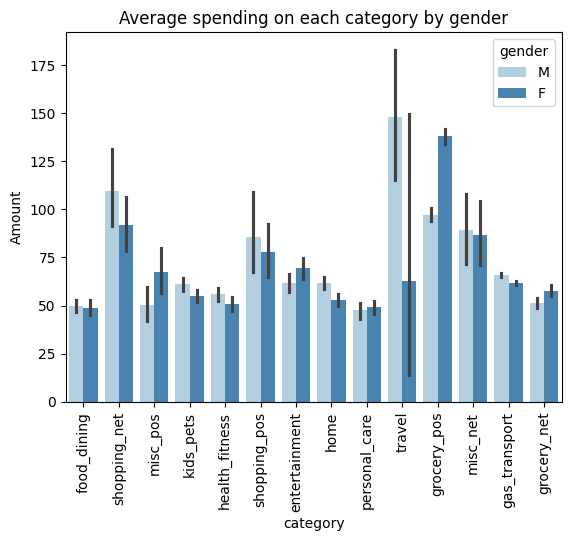

In [33]:
category_gender_grouped = df.groupby(["category", "gender"])
avg_amt_category_gender_grouped = category_gender_grouped["amt"].mean()
print(avg_amt_category_gender_grouped)
sns.barplot(x = "category", hue = "gender", y = "amt", data = df, palette = "Blues")
plt.title("Average spending on each category by gender")
plt.xlabel("category")
plt.ylabel("Amount")
plt.xticks(rotation = 90)
plt.show()

### 16. Who spent most amount on travel category

In [34]:
max_spent = df.groupby(["category", "card_holder"])["amt"].mean()
print(max_spent["travel"].sort_values(ascending = False).head(1))

card_holder
Gloria Wallace    11872.21
Name: amt, dtype: float64


### 17. Who are the card-holders that have the highest transactions

card_holder
Kayla Jones         72
Lindsay Wilson      69
Christine Harris    66
Jennifer Black      64
Lisa Lowe           64
Keith Sanders       64
David Miller        64
Jodi Rodriguez      63
Sara Ramirez        63
Donna Moreno        59
Name: count, dtype: int64


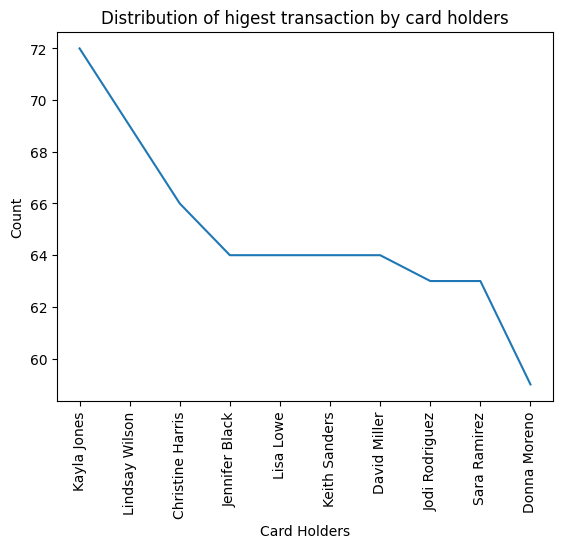

In [35]:
highest_transaction = df["card_holder"].value_counts()
top_10_highest_transaction = highest_transaction.head(10)
print(top_10_highest_transaction)
sns.lineplot(top_10_highest_transaction)
plt.title("Distribution of higest transaction by card holders")
plt.xlabel("Card Holders")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.show()

### 18. Which merchant have the highest number of transactions

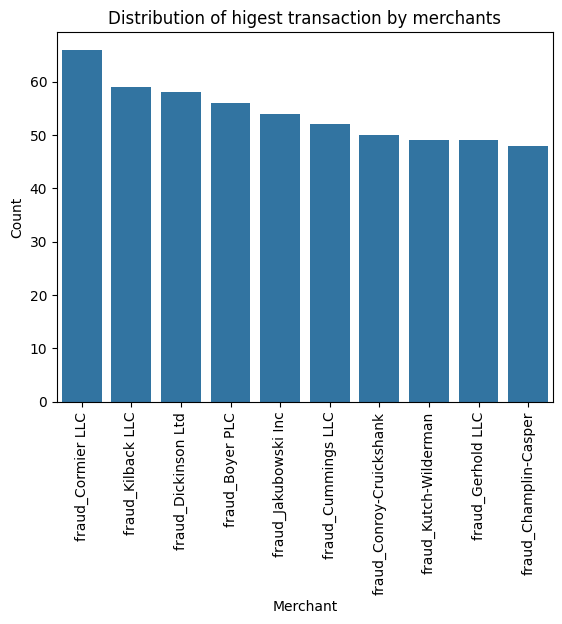

In [36]:

most_merch = df["merchant"].value_counts()
top_most_merch = most_merch.head(10)
sns.barplot(top_most_merch)
plt.title("Distribution of higest transaction by merchants")
plt.xlabel("Merchant")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.show()

### 19. how does the distribution of amount vary by category

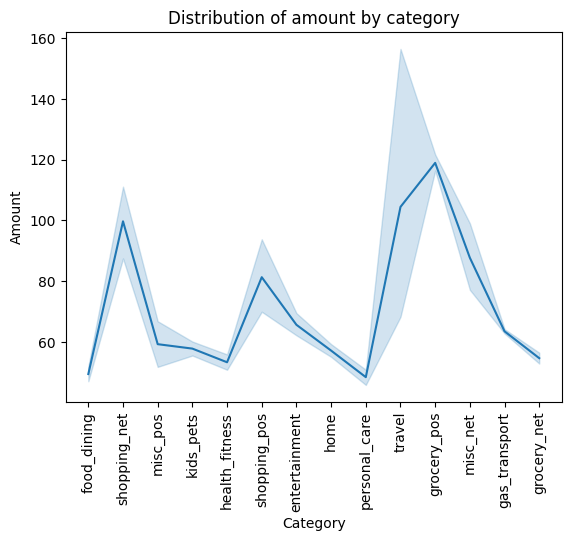

In [37]:
sns.lineplot(x = "category", y = "amt", data = df)
plt.title("Distribution of amount by category")
plt.xlabel("Category")
plt.ylabel("Amount")
plt.xticks(rotation = 90)
plt.show()

### 20. How does the average spending vary by the states

state
AL     65.821139
AR     73.532667
AZ     76.027163
CA     73.143128
CO     87.805817
CT     56.692695
DC     71.327927
FL     73.342265
GA     68.763123
IA     57.860520
ID     88.190649
IL     65.134163
IN     58.283837
KS     57.066822
KY     57.013901
LA     67.288657
MA     53.556738
MD     82.504811
ME     61.483188
MI     77.778623
MN     73.262097
MO     74.025224
MS     63.304814
MT     65.775802
NC     89.547844
ND     52.663826
NE     55.040807
NH    138.285929
NJ     63.878939
NM     78.463171
NV     56.886304
NY     79.354947
OH     80.150160
OK     59.289810
OR     62.859638
PA     84.550024
RI     80.855000
SC     59.031678
SD     66.090000
TN     82.729539
TX     62.859450
UT     54.229273
VA     76.554314
VT     78.575135
WA     84.278871
WI     65.268304
WV     63.015456
WY     60.019922
Name: amt, dtype: float64


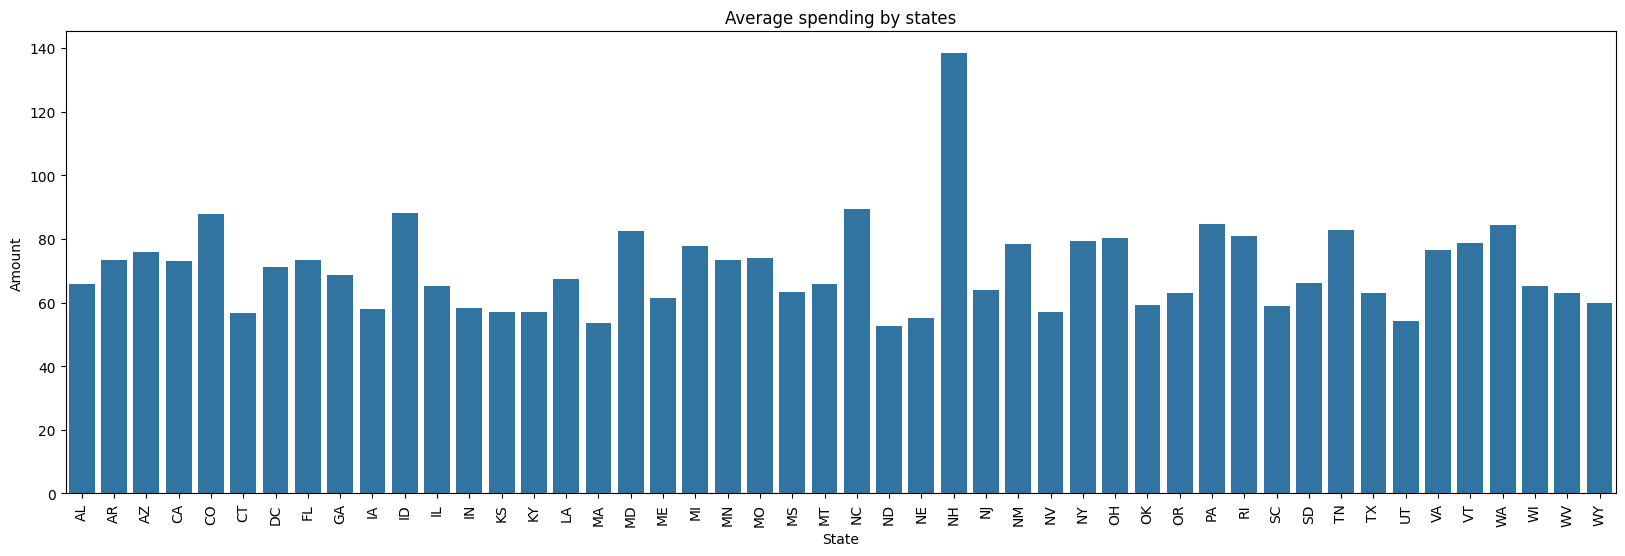

In [38]:
state_grouped = df.groupby("state")
amt_grouped = state_grouped["amt"]
state_avg_amt = state_grouped["amt"].mean()
print(state_avg_amt)
plt.figure(figsize = (20,6))
sns.barplot(state_avg_amt)
plt.title("Average spending by states")
plt.xlabel("State")
plt.ylabel("Amount")
plt.xticks(rotation = 90)
plt.show()

### 21. What is the percentage of fraud in the transaction

is_fraud
0.0    18776
1.0      165
Name: count, dtype: int64


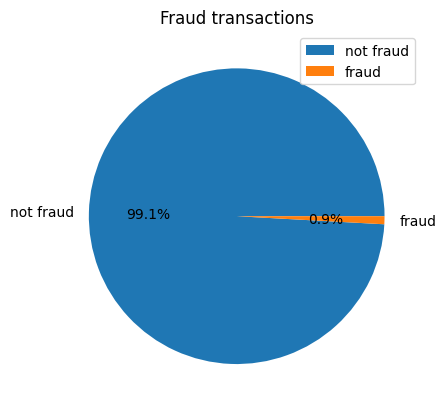

In [39]:
fraud_count = df["is_fraud"].value_counts()
print(fraud_count)
plt.pie(fraud_count, labels = ["not fraud", "fraud"], autopct='%1.1f%%')
plt.title("Fraud transactions")
plt.legend()
plt.show()

### 22. Who are the card-holders involved in fraudulent activities

In [40]:
fraud_transactions = df[df["is_fraud"] == 1]
fraud_cardholders = fraud_transactions["card_holder"]
print(fraud_cardholders.unique())

['Jason Murphy' 'Misty Hart' 'Heather Chase' 'Helen Campbell' 'Mark Allen'
 'Eric Patel' 'Jennifer Carrillo' 'Rebecca Farley' 'Amber Perez'
 'Jennifer Scott' 'Justin Gay' 'Tina Lawrence' 'Larry House'
 'Andrew Tucker' 'Becky Mckinney' 'Michelle Juarez' 'Dorothy Zuniga'
 'Kelly Zimmerman' 'Nicholas Mcmahon' 'Dustin Roberts' 'Briana Santos'
 'Patrick Vaughan']


### 23. Which card-holder did the most fraudulent activities

card_holder
Eric Patel           13
Heather Chase        12
Rebecca Farley       11
Becky Mckinney       11
Jennifer Carrillo    11
Andrew Tucker        10
Dustin Roberts        9
Mark Allen            9
Jason Murphy          8
Larry House           8
Tina Lawrence         7
Misty Hart            7
Justin Gay            7
Dorothy Zuniga        6
Michelle Juarez       6
Helen Campbell        5
Kelly Zimmerman       5
Nicholas Mcmahon      5
Briana Santos         4
Amber Perez           4
Patrick Vaughan       4
Jennifer Scott        3
Name: count, dtype: int64


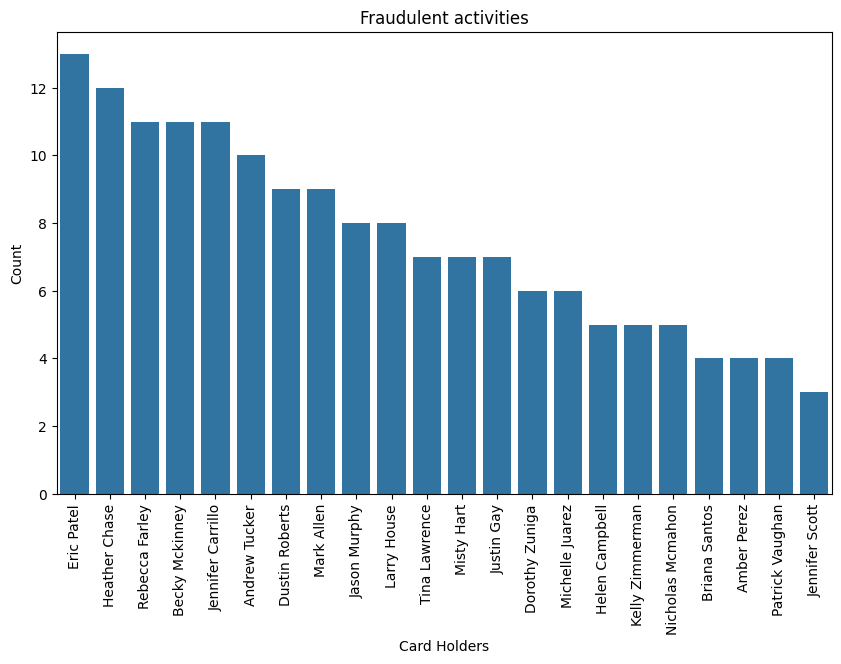

In [41]:
print(fraud_cardholders.value_counts())
plt.figure(figsize = (10,6))
sns.barplot(fraud_cardholders.value_counts())
plt.title("Fraudulent activities")
plt.xlabel("Card Holders")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.show()

### 24. Which state have the most fraudulent activites

In [42]:
fraud_transactions_states = fraud_transactions["state"]
print(fraud_transactions_states.value_counts())

state
PA    27
NY    27
NC    17
OH    13
VA    11
AL    11
ME    11
AR     9
TX     7
CA     6
MO     5
NE     5
TN     5
SD     4
IN     4
FL     3
Name: count, dtype: int64


### 25. Which age group has the highest transactions

age_group
41-60    7303
Name: count, dtype: int64


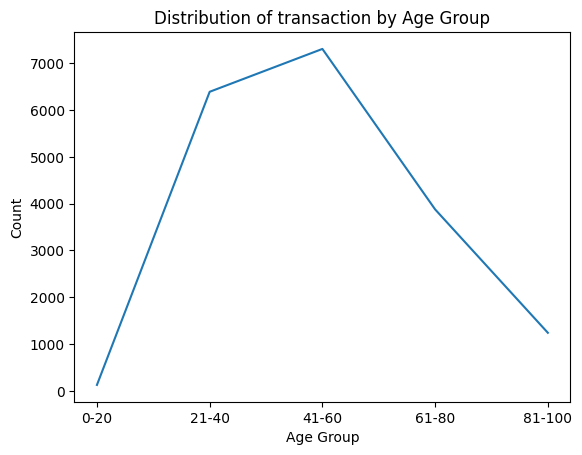

In [43]:
age_group = df["age_group"].value_counts()
print(age_group.head(1))
sns.lineplot(age_group)
plt.title("Distribution of transaction by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

# Summary of Credit Card Transaction Analysis
## Key Findings:

#### * Spending Patterns:
*  "Home" is the most frequent transaction category.
*  Female cardholders tend to use credit cards more often.
*  There's a positive correlation between city population and spending.
#### * Fraudulent Activity:
*  The fraud rate is relatively low (0.9%).
*  "Eric Patel" is identified as the individual with the highest number of fraudulent transactions.
#### * Customer Segmentation:
*  Cardholders aged 41-60 are the most active.
*  The 21-40 age group exhibits the highest average spending.
*  Specific job categories (e.g., "Conservator") show higher average spending.
### Recommendations:

* Fraud Prevention: Implement stricter security measures for high-risk cardholders and transactions.
* Customer Segmentation: Target specific customer segments with tailored marketing campaigns.
* Market Analysis: Analyze spending patterns to identify potential growth areas.
* Data-Driven Decision Making: Utilize data-driven insights to optimize business strategies and improve customer experience.

## Conclusion:

This EDA provides valuable insights into credit card transactions, paving the way for a deeper understanding of customer behavior and potential risks. By leveraging these findings, financial institutions can enhance customer experience, optimize strategies, and effectively mitigate fraud.